<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Video_Games_Sale_Prediction_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Games Sales Prediction and EDA

<hr>

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats
print("Necessary packages included successfully!")

Necessary packages included successfully!


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/vgsales.csv'
data = pd.read_csv(url,error_bad_lines=False)
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [7]:
data.shape

(16250, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


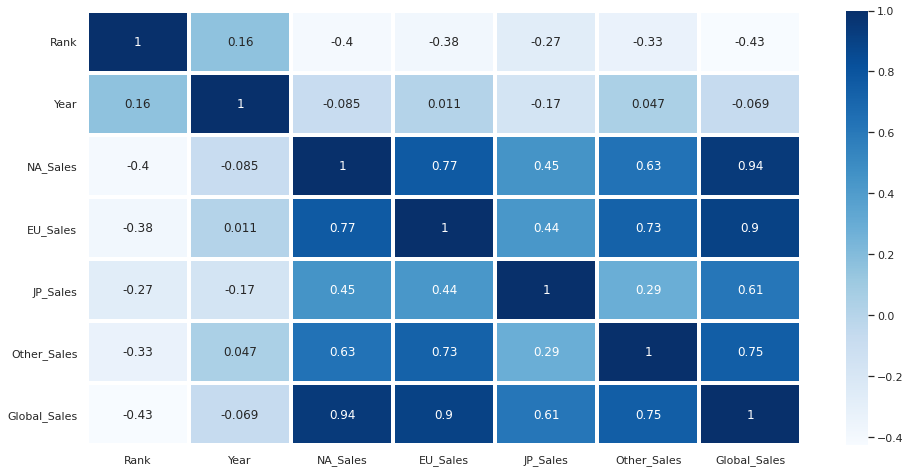

In [62]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

In [11]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Frequency of games from each Genre\n')

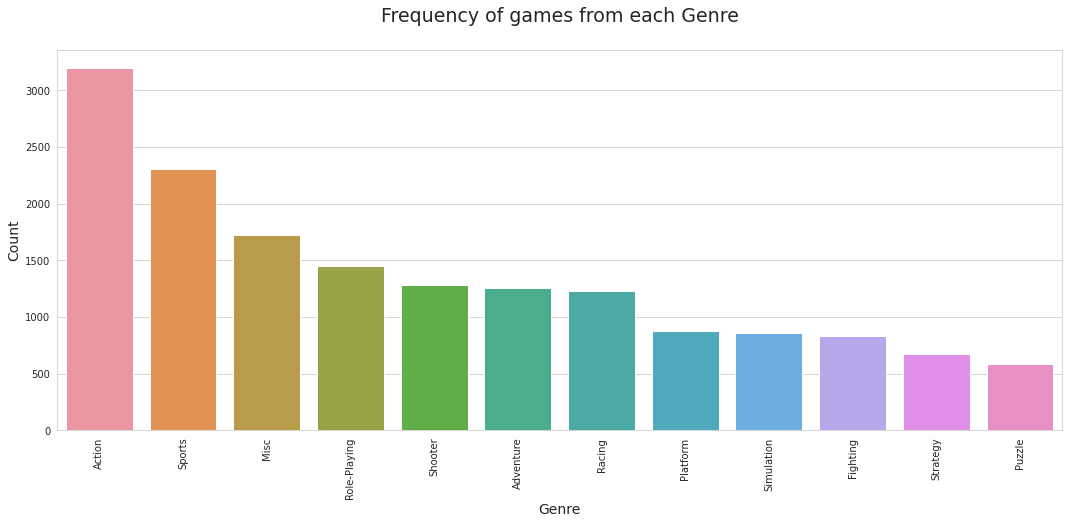

In [14]:
plt.figure(figsize=(18, 7))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Genre",size=14)
plt.ylabel("Count",size=14)
plt.title("Frequency of games from each Genre\n",size=19)

Text(0.5, 1.0, 'Frequency of games from each Year of release\n')

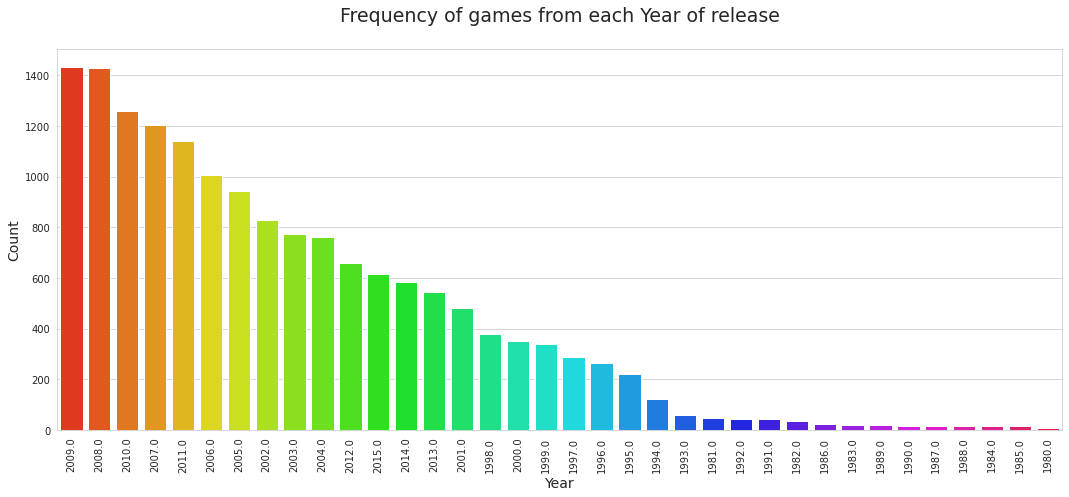

In [21]:
plt.figure(figsize=(18,7))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index,palette='hsv')
plt.xticks(rotation=90)
plt.xlabel("Year",size=14)
plt.ylabel("Count",size=14)
plt.title("Frequency of games from each Year of release\n",size=19)

Text(0.5, 1.0, 'Year vs Genre of games\n')

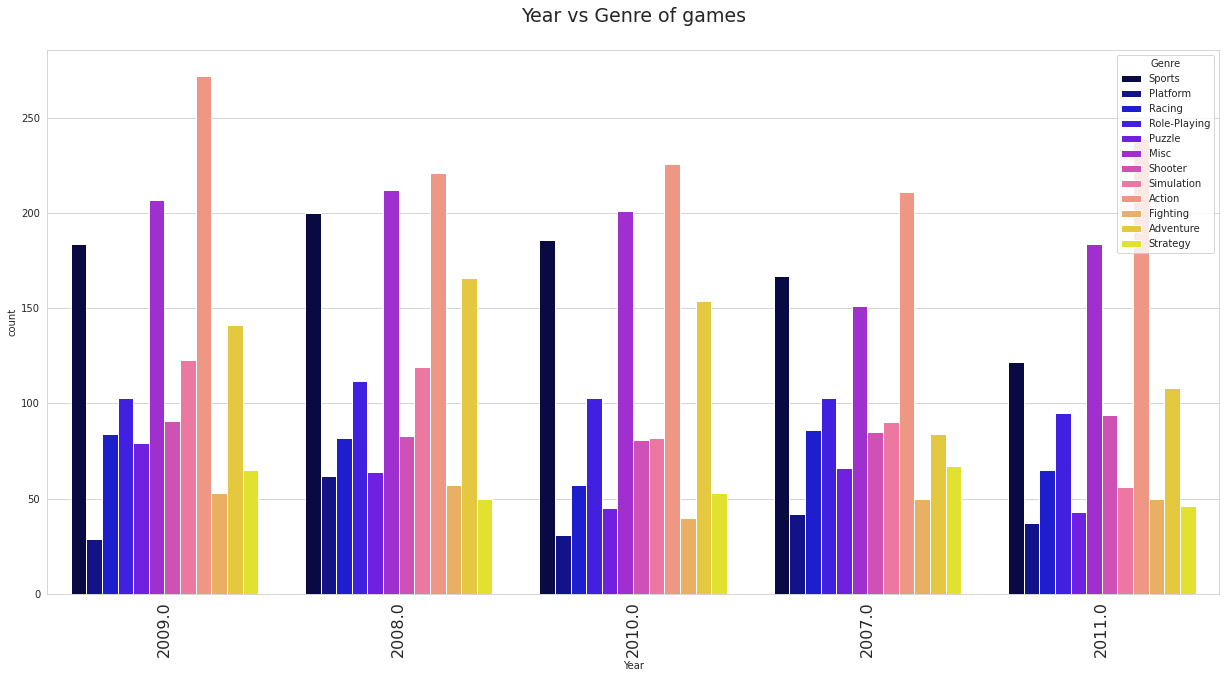

In [30]:
plt.figure(figsize=(21, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index,palette='gnuplot2')
plt.xticks(size=16, rotation=90)
plt.title("Year vs Genre of games\n",size=19)

Text(0.5, 1.0, 'Global sales of games in each year\n')

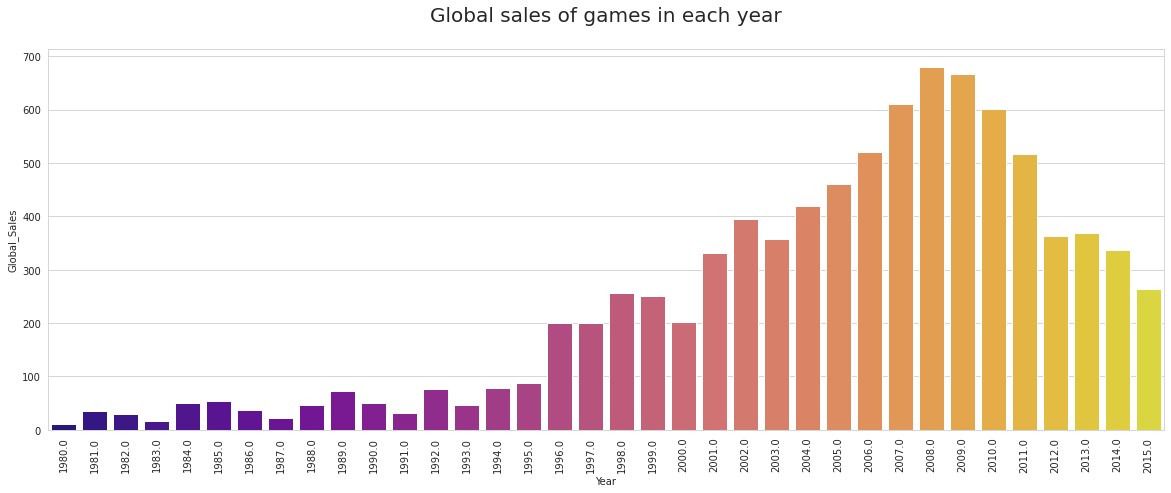

In [19]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(20, 7))
sns.barplot(x="Year", y="Global_Sales", data=data_year,palette='plasma')
plt.xticks(rotation=90)
plt.title("Global sales of games in each year\n",size=20)

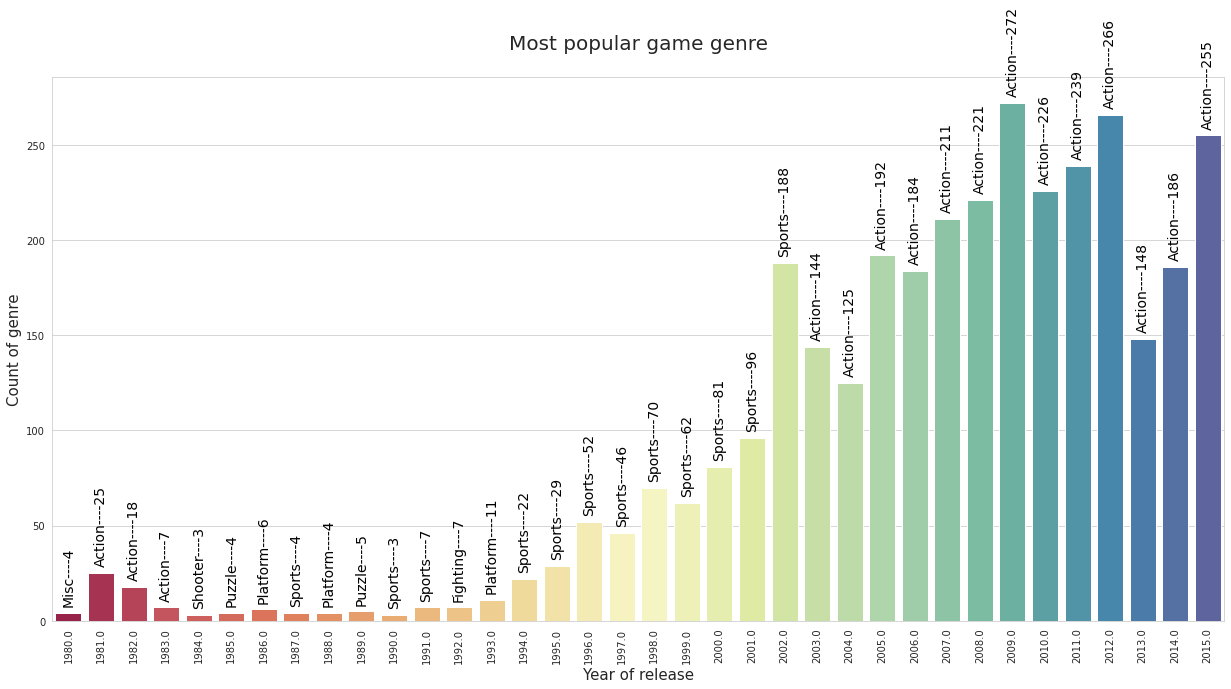

In [31]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values

plt.figure(figsize=(21, 10))
g = sns.barplot(x='Year', y='count', data=year_max_genre,palette='Spectral')
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.xlabel("Year of release",size=15)
plt.ylabel("Count of genre",size=15)
plt.title("Most popular game genre\n",size=20)
plt.show()

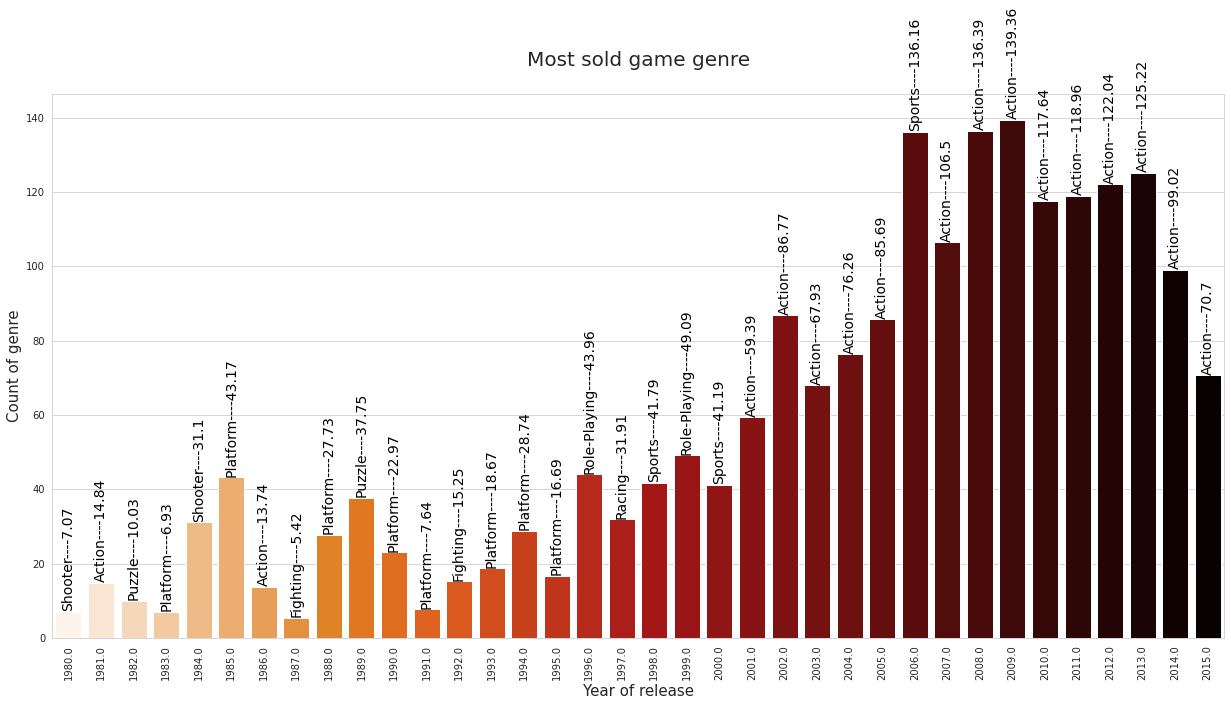

In [36]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(21,10))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max,palette='gist_heat_r')
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.xlabel("Year of release",size=15)
plt.ylabel("Count of genre",size=15)
plt.title("Most sold game genre\n",size=20)
plt.show()

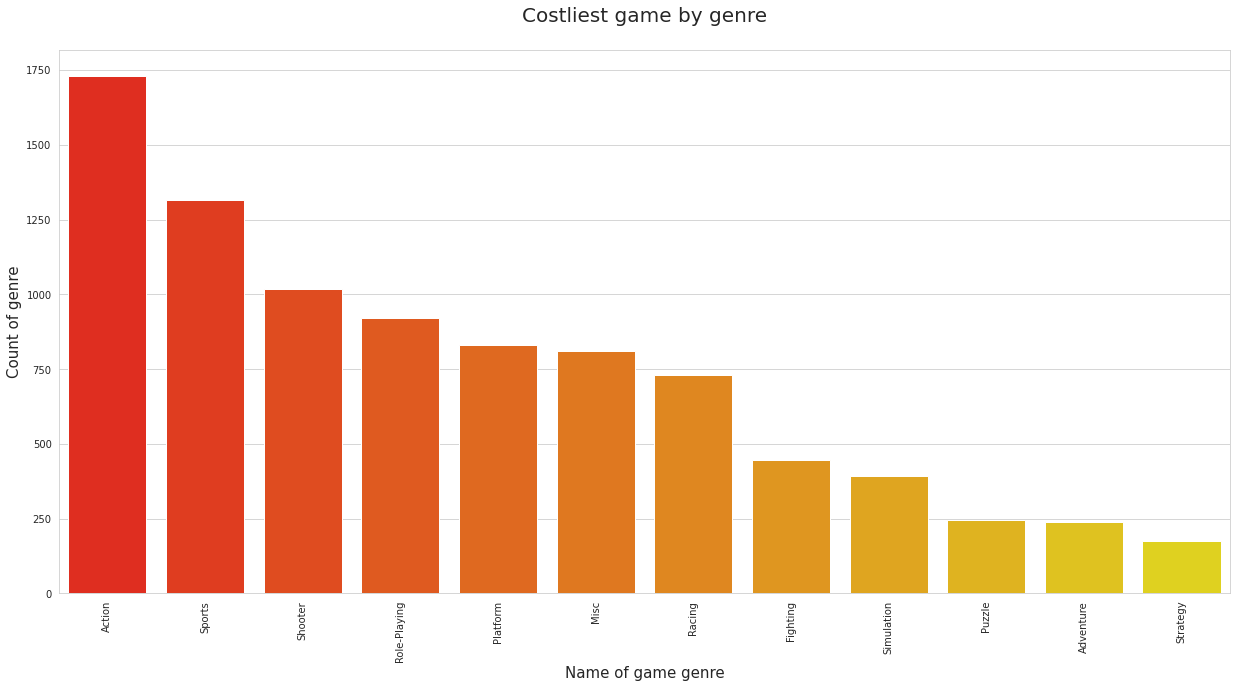

In [41]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(21, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre,palette='autumn')
plt.xticks(rotation=90)
plt.xlabel("Name of game genre",size=15)
plt.ylabel("Count of genre",size=15)
plt.title("Costliest game by genre\n",size=20)
plt.show()

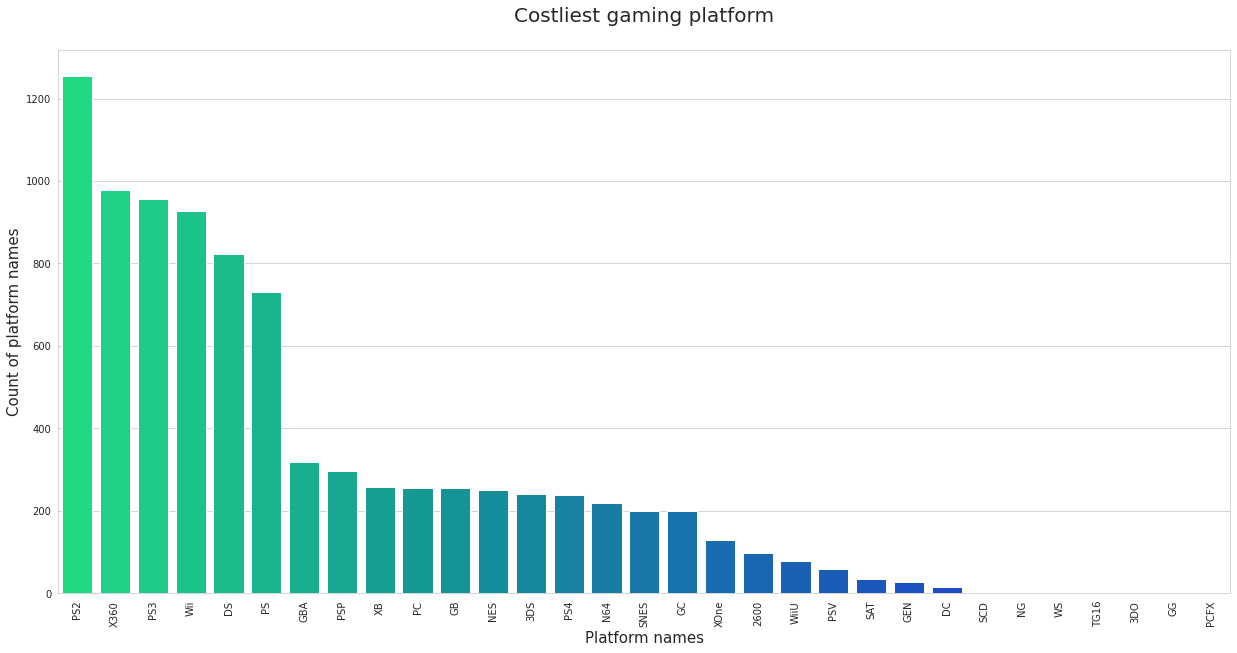

In [40]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(21, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform,palette='winter_r')
plt.xticks(rotation=90)

plt.xlabel("Platform names",size=15)
plt.ylabel("Count of platform names",size=15)
plt.title("Costliest gaming platform\n",size=20)
plt.show()

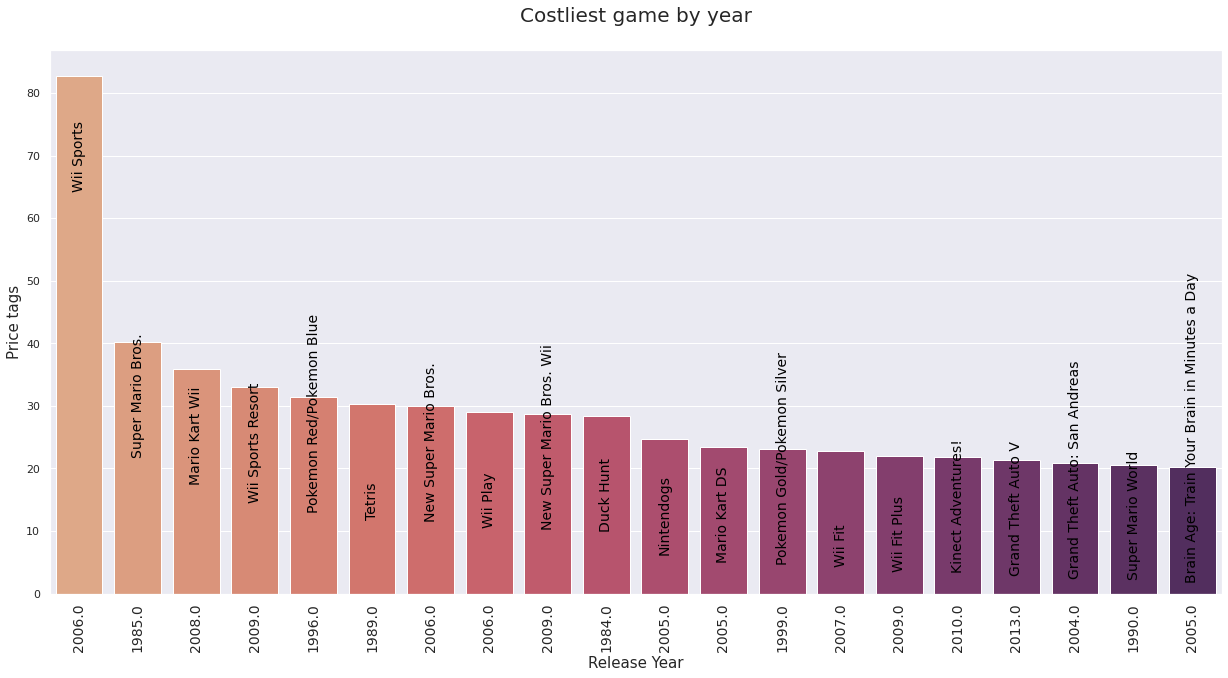

In [47]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(21,10))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale,palette='flare')
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year',size=15)
plt.ylabel("Price tags",size=15)
plt.title("Costliest game by year\n",size=20)

plt.show()

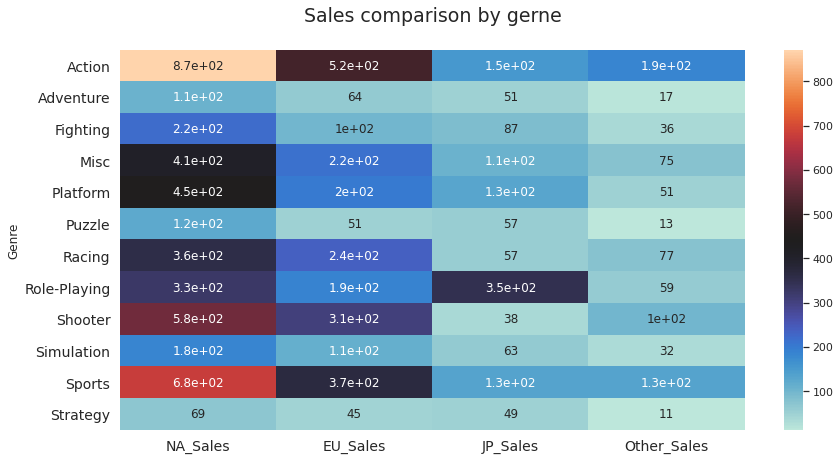

In [48]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
plt.figure(figsize=(14, 7))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, cmap='icefire')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Sales comparison by gerne\n",size=19)
plt.show()

In [49]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head(10)

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26
5,Puzzle,NA_Sales,123.78
6,Racing,NA_Sales,359.09
7,Role-Playing,NA_Sales,325.89
8,Shooter,NA_Sales,575.16
9,Simulation,NA_Sales,183.04


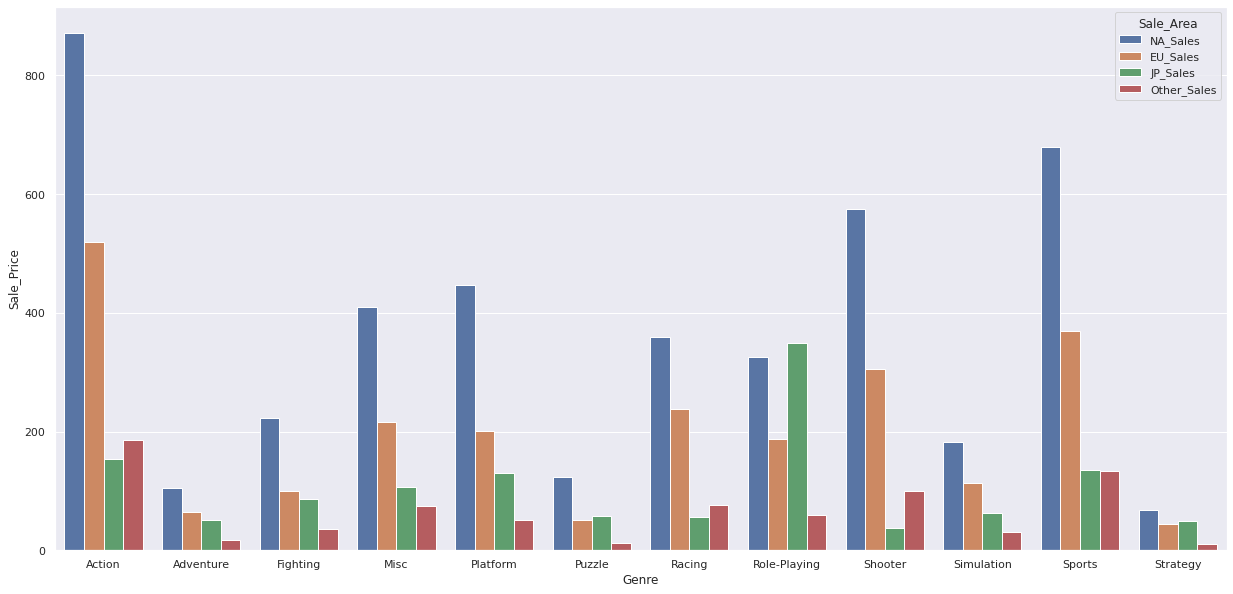

In [50]:
plt.figure(figsize=(21, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

In [51]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [52]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


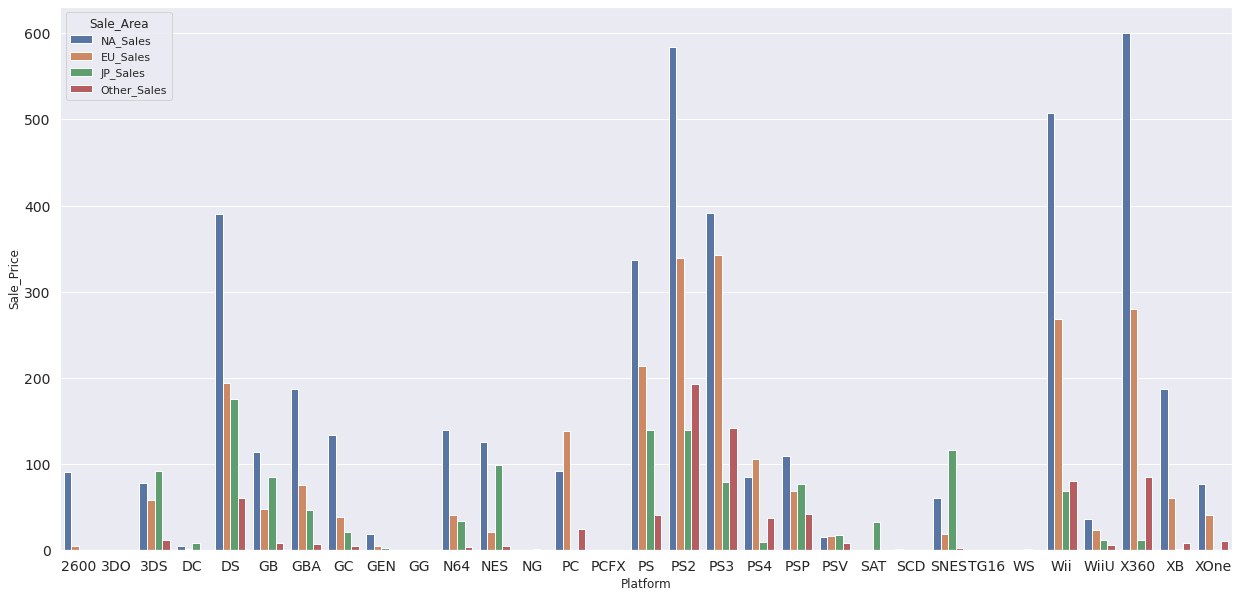

In [53]:
plt.figure(figsize=(21,10))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

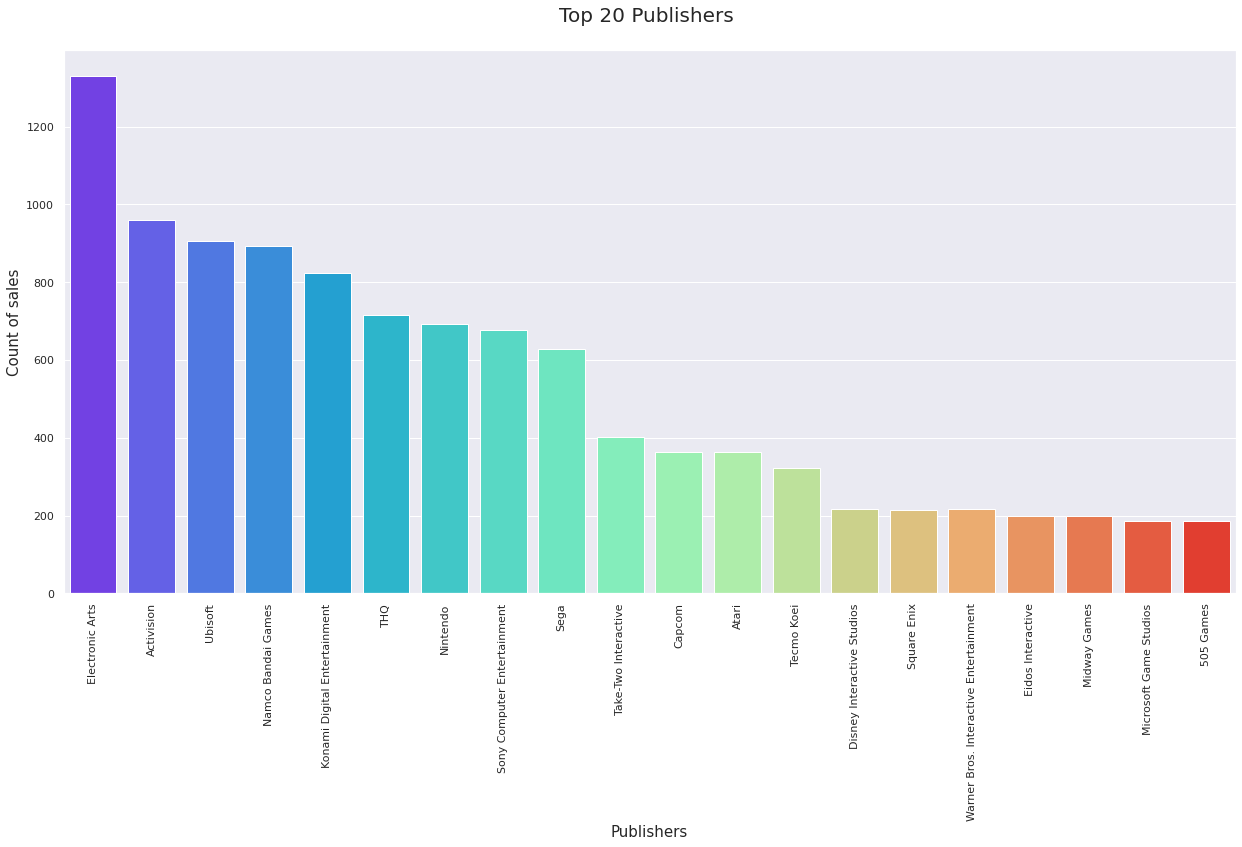

In [56]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

plt.figure(figsize=(21, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index,palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel("Publishers",size=15)
plt.ylabel("Count of sales",size=15)
plt.title("Top 20 Publishers \n",size=20)
plt.show()

In [57]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


Text(0.5, 1.0, 'Top sales by region\n')

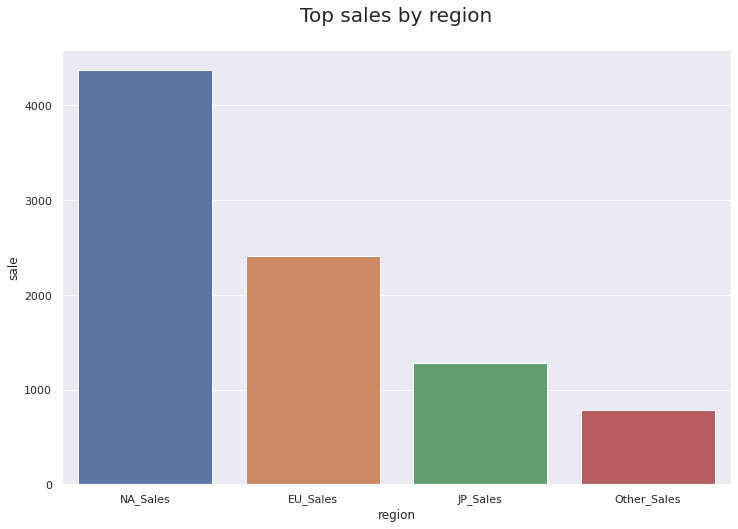

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)
plt.title("Top sales by region\n",size=20)

([<matplotlib.patches.Wedge at 0x7fe99ad3a1d0>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

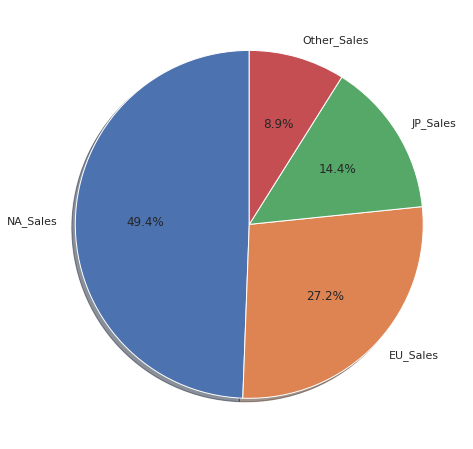

In [59]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

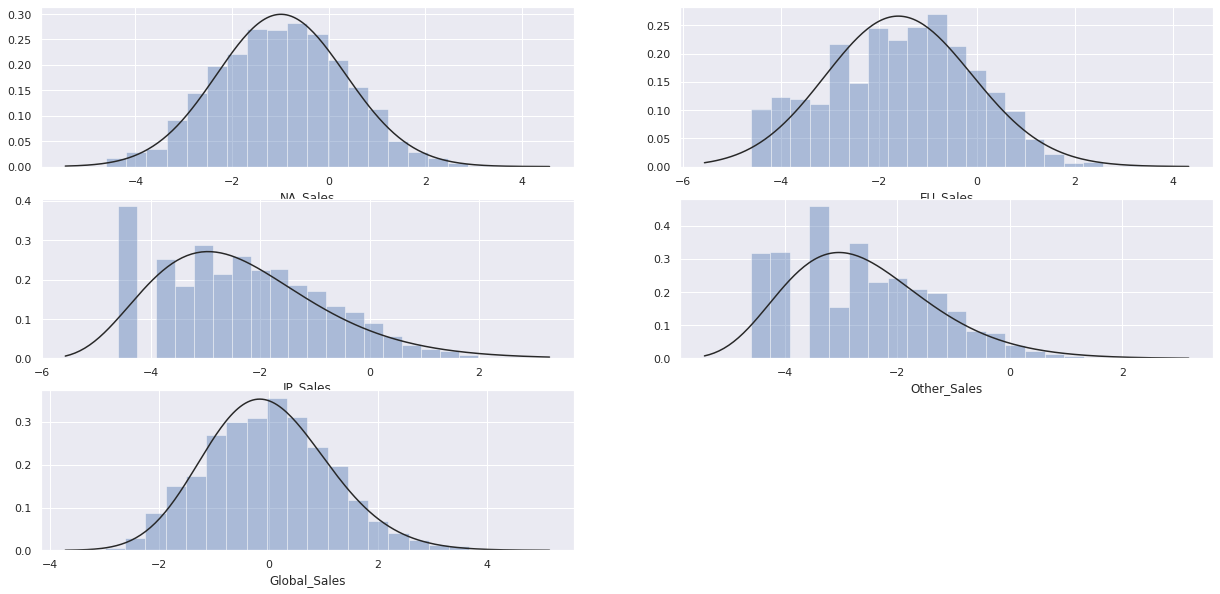

In [61]:
data_hist_log = data.copy()
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

plt.figure(figsize=(21, 10))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

## Normal distributed sales prediction

In [63]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


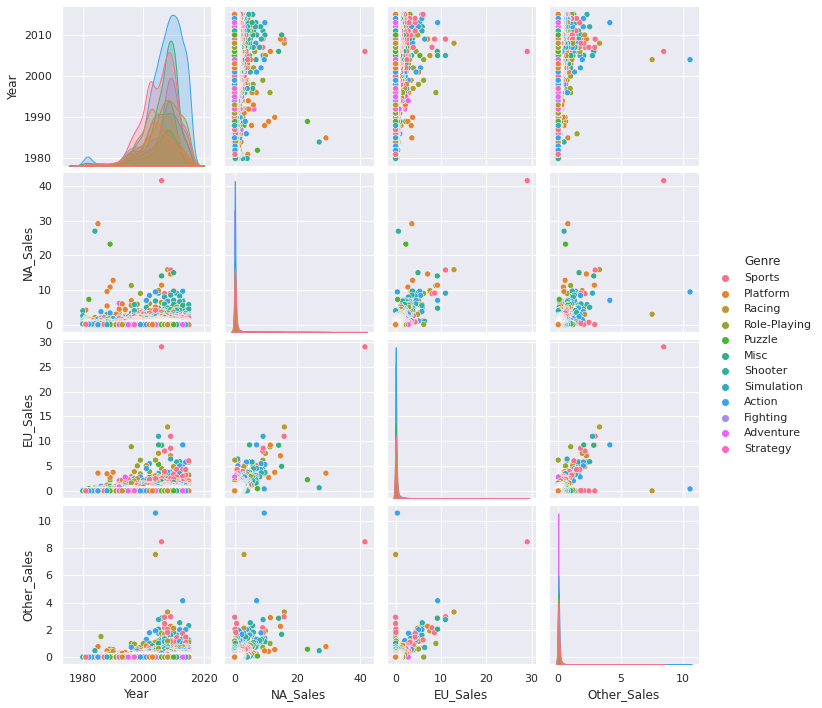

In [64]:
sns.pairplot(data_pair, hue='Genre')

In [65]:
data_pair_log = data_pair.copy()
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14071,1998.0,PC,Role-Playing,0.01,0.02,0.01
14183,2014.0,PS3,Racing,0.02,0.01,0.01
14185,2011.0,PC,Puzzle,0.01,0.02,0.01
14267,2007.0,PC,Puzzle,0.01,0.02,0.01


## Logarithmic Sales Prediction

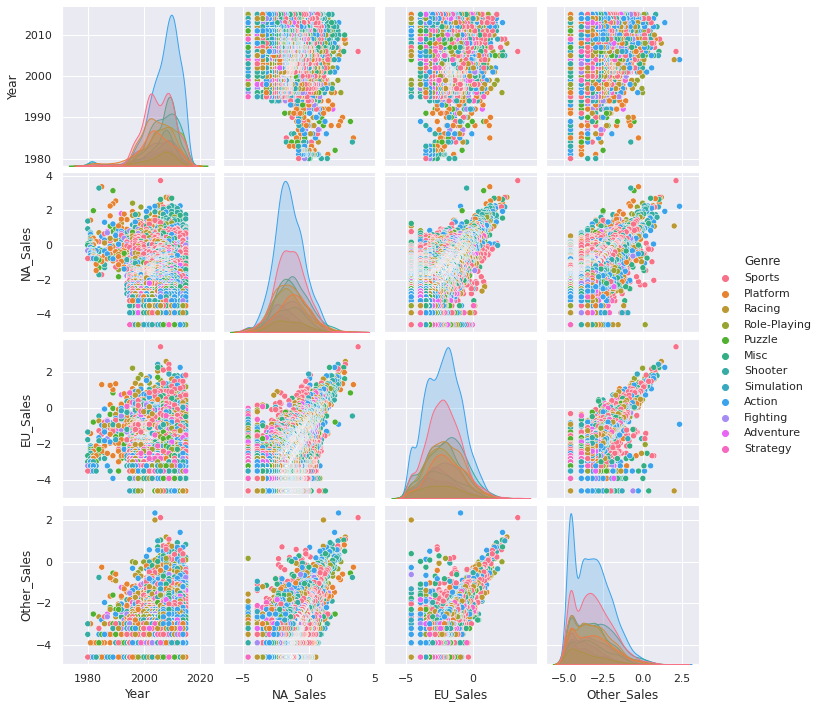

In [66]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);
sns.pairplot(data_pair_log, hue='Genre',  palette="husl")